<h1>FAMILY INCOME AND EXPENDITURE ANALYSIS</h1>

<p>ANALYST: PETER PAUL F. ECLAVEA & CARL MENARD PALILLO</p>

In [3]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings 
import folium
from folium.plugins import HeatMap
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('datasets\\Family Income and Expenditure.csv')

In [5]:
df

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,1,0,0,0,0,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41539,119773,XII - SOCCSKSARGEN,44875,Enterpreneurial Activities,1,23675,21542,1476,6120,1632,...,0,0,0,0,0,1,0,0,0,0
41540,137320,XII - SOCCSKSARGEN,31157,Enterpreneurial Activities,1,2691,1273,1886,4386,1840,...,0,0,0,0,0,3,0,0,0,0
41541,133171,XII - SOCCSKSARGEN,45882,Enterpreneurial Activities,2,28646,27339,480,4796,1232,...,0,0,0,0,0,1,0,0,0,0
41542,129500,XII - SOCCSKSARGEN,81416,Enterpreneurial Activities,1,29996,26655,2359,17730,2923,...,0,0,0,0,0,2,0,0,0,0


In [6]:
df['Total Household Income'].mean()


np.float64(247555.58480165608)

In [7]:
df.groupby('Region')['Total Household Income'].mean().idxmax()


'NCR'

In [8]:
df['Total Food Expenditure'].mean()


np.float64(85099.15819372232)

In [9]:
df[['Total Household Income', 'Total Food Expenditure']].corr()


,Total Household Income,Total Food Expenditure
Total Household Income,1.00000,0.66366
Total Food Expenditure,0.66366,1.00000


In [10]:
df.groupby('Region')['Total Rice Expenditure'].mean().idxmin()


'IX - Zasmboanga Peninsula'

In [11]:
df[df['Agricultural Household indicator'] == 1].shape[0]


9018

In [12]:
df['Main Source of Income'].mode()[0]


'Wage/Salaries'

In [13]:
df['Total Number of Family members'].mean()


np.float64(4.635181975736568)

In [14]:
df['Electricity'].mean() * 100


np.float64(89.08145580589255)

In [15]:
df['Household Head Marital Status'].mode()[0]


'Married'

<h1> 1. What is the distribution of total household income? </h1> 

<h2>INSIGHT</h2>
<h3> The distribution of total household income shows a right-skewed pattern, indicating that most households have lower incomes, with fewer households having very high incomes. </h3> 

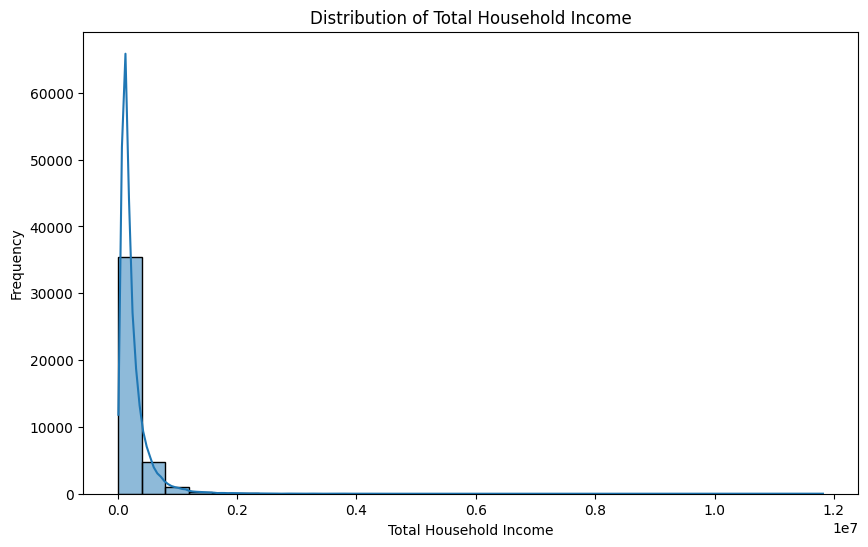

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Total Household Income'], bins=30, kde=True)
plt.title('Distribution of Total Household Income')
plt.xlabel('Total Household Income')
plt.ylabel('Frequency')
plt.show()

<h1> 2. What is the average total food expenditure by region? </h1> 

<h2>INSIGHT</h2>
<h3> The average total food expenditure varies by region, with some regions spending significantly more on food than others, indicating regional differences in food costs or consumption habits. </h3> 

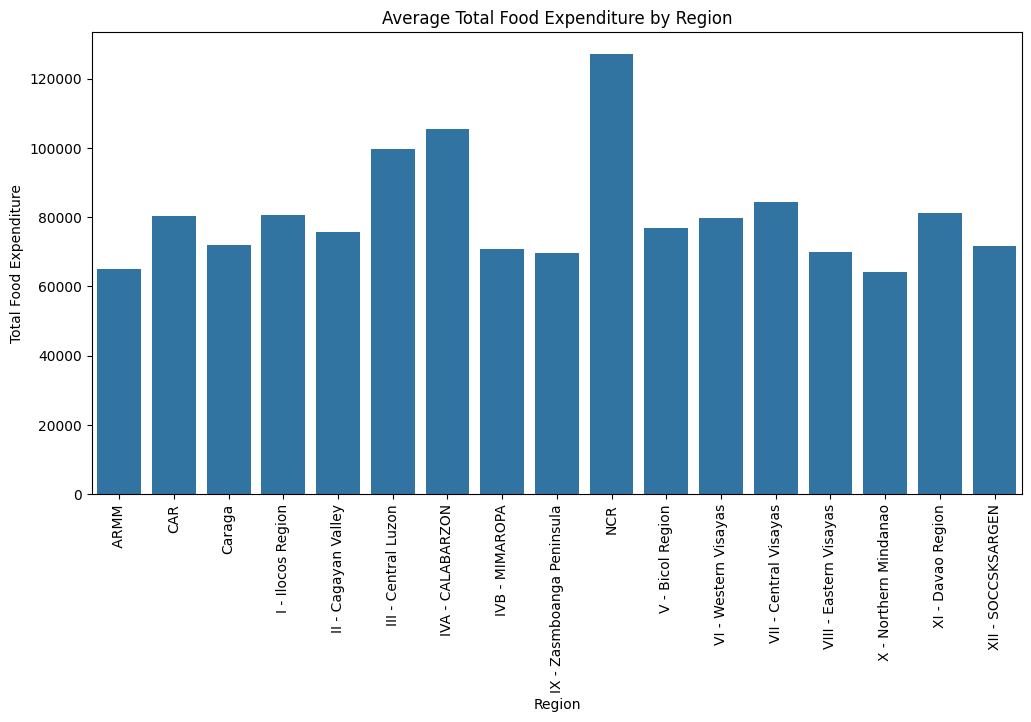

In [17]:
avg_food_expenditure = df.groupby('Region')['Total Food Expenditure'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='Total Food Expenditure', data=avg_food_expenditure)
plt.title('Average Total Food Expenditure by Region')
plt.xticks(rotation=90)
plt.show()

<h1>3. How does total household income vary with the main source of income? </h1> 

<h2>INSIGHT</h2>
<h3>  The boxplot reveals that households with entrepreneurial activities tend to have higher total household incomes compared to those relying on wages or salaries, suggesting that entrepreneurship may lead to greater financial success. </h3> 

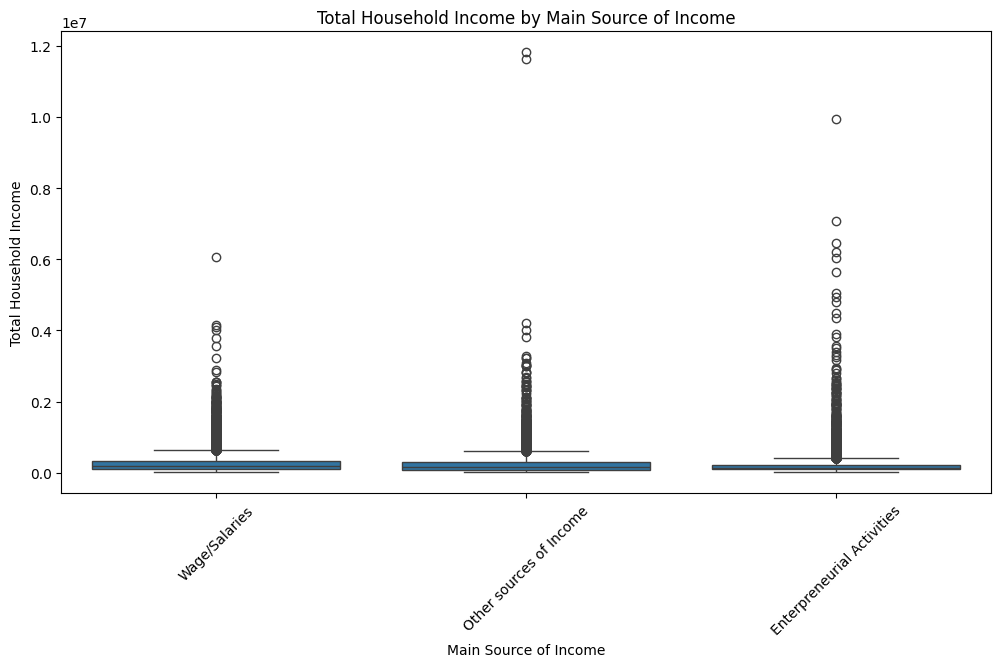

In [18]:

plt.figure(figsize=(12, 6))
sns.boxplot(x='Main Source of Income', y='Total Household Income', data=df)
plt.title('Total Household Income by Main Source of Income')
plt.xticks(rotation=45)
plt.show()

<h1> 4. What is the relationship between total food expenditure and total household income?</h1> 

<h2>INSIGHT</h2>
<h3> The scatter plot indicates a positive correlation between total household income and total food expenditure, suggesting that as income increases, food expenditure also tends to increase. </h3> 

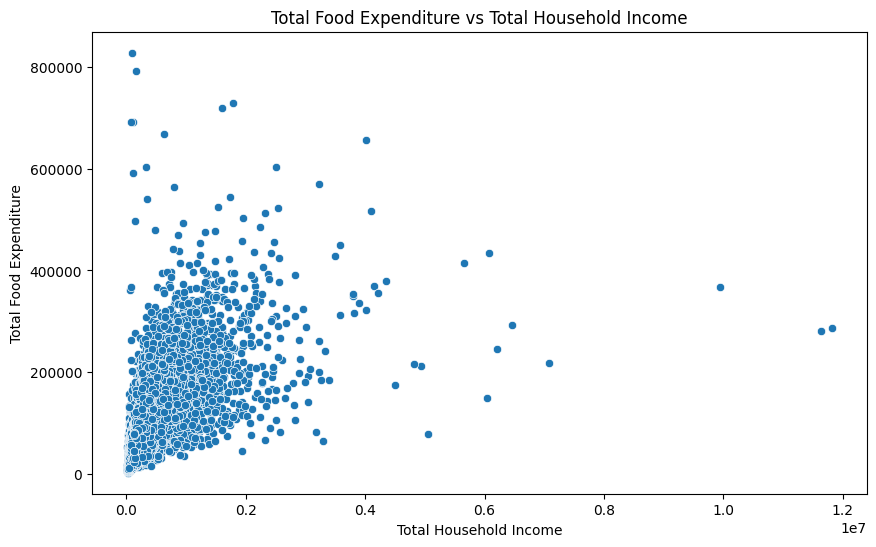

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total Household Income', y='Total Food Expenditure', data=df)
plt.title('Total Food Expenditure vs Total Household Income')
plt.xlabel('Total Household Income')
plt.ylabel('Total Food Expenditure')
plt.show()

<h1> 5.</h1> 

<h2>INSIGHT</h2>
<h3> Some regions like NCR show higher income but also proportionally high food expenditure, indicating possible lower purchasing power parity or cost of living differences.

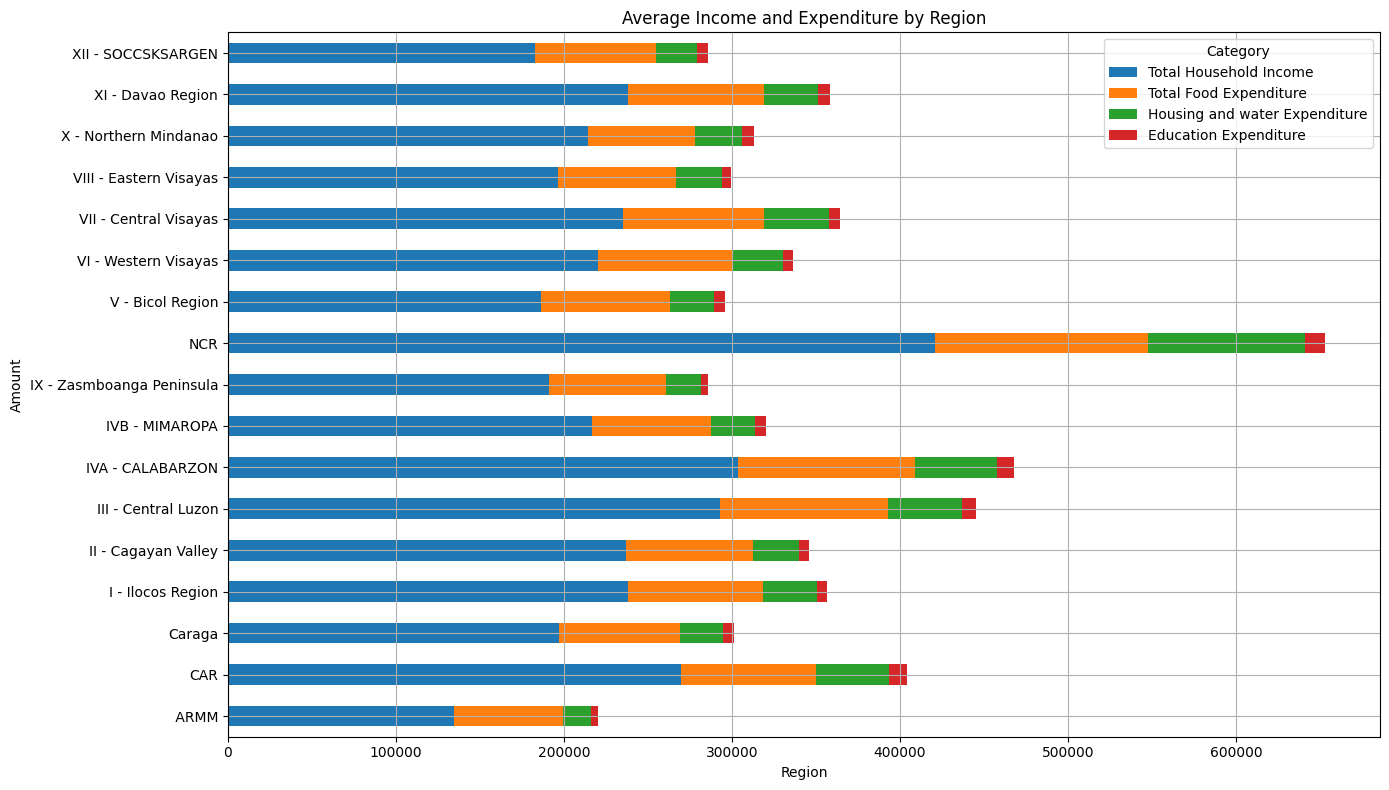

In [42]:
region_summary = df.groupby('Region')[[
    'Total Household Income', 
    'Total Food Expenditure',
    'Housing and water Expenditure',
    'Education Expenditure'
]].mean().reset_index()

region_summary.set_index('Region').plot(kind='barh', stacked=True, figsize=(14, 8))
plt.title('Average Income and Expenditure by Region')
plt.xlabel('Region')
plt.ylabel('Amount')
plt.legend(title='Category')
plt.grid()
plt.tight_layout()
plt.show()

<h1> 6. How many family members are employed in each region?</h1> 

<h2>INSIGHT</h2>
<h3> The bar chart illustrates that certain regions have a higher total number of employed family members, which may correlate with economic opportunities available in those areas.</h3> 

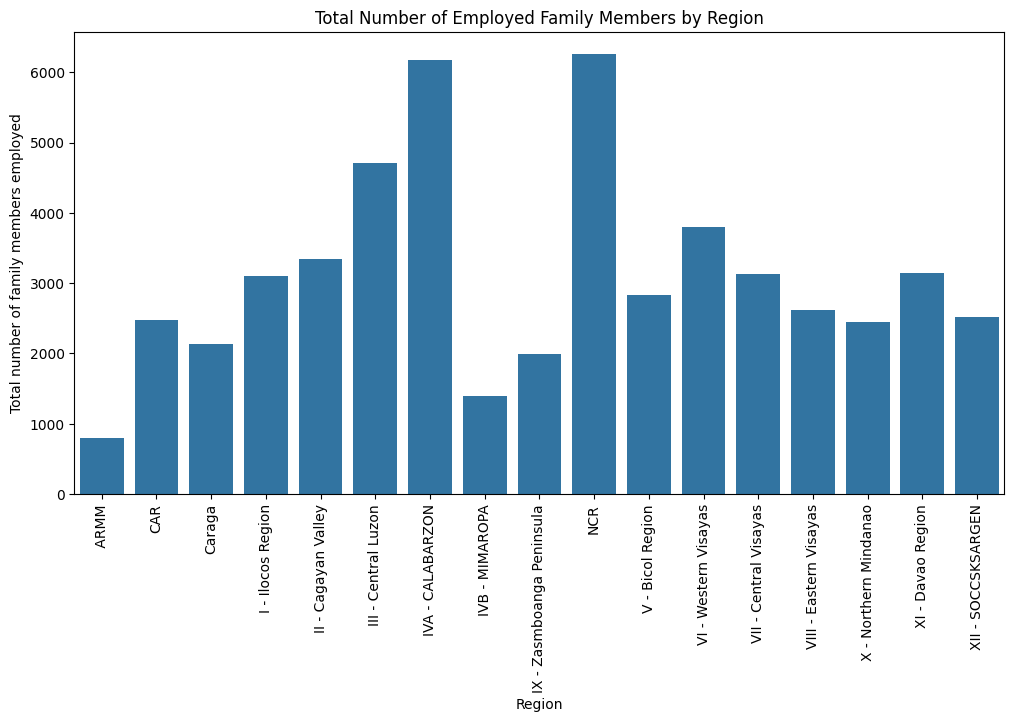

In [21]:

employment_count = df.groupby('Region')['Total number of family members employed'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='Total number of family members employed', data=employment_count)
plt.title('Total Number of Employed Family Members by Region')
plt.xticks(rotation=90)
plt.show()


<h1> 7. What is the average expenditure on education by household head's highest grade completed? </h1> 

<h2>INSIGHT</h2>
<h3> The average education expenditure tends to increase with the highest grade completed, indicating that higher educational attainment is associated with greater investment in education. </h3> 

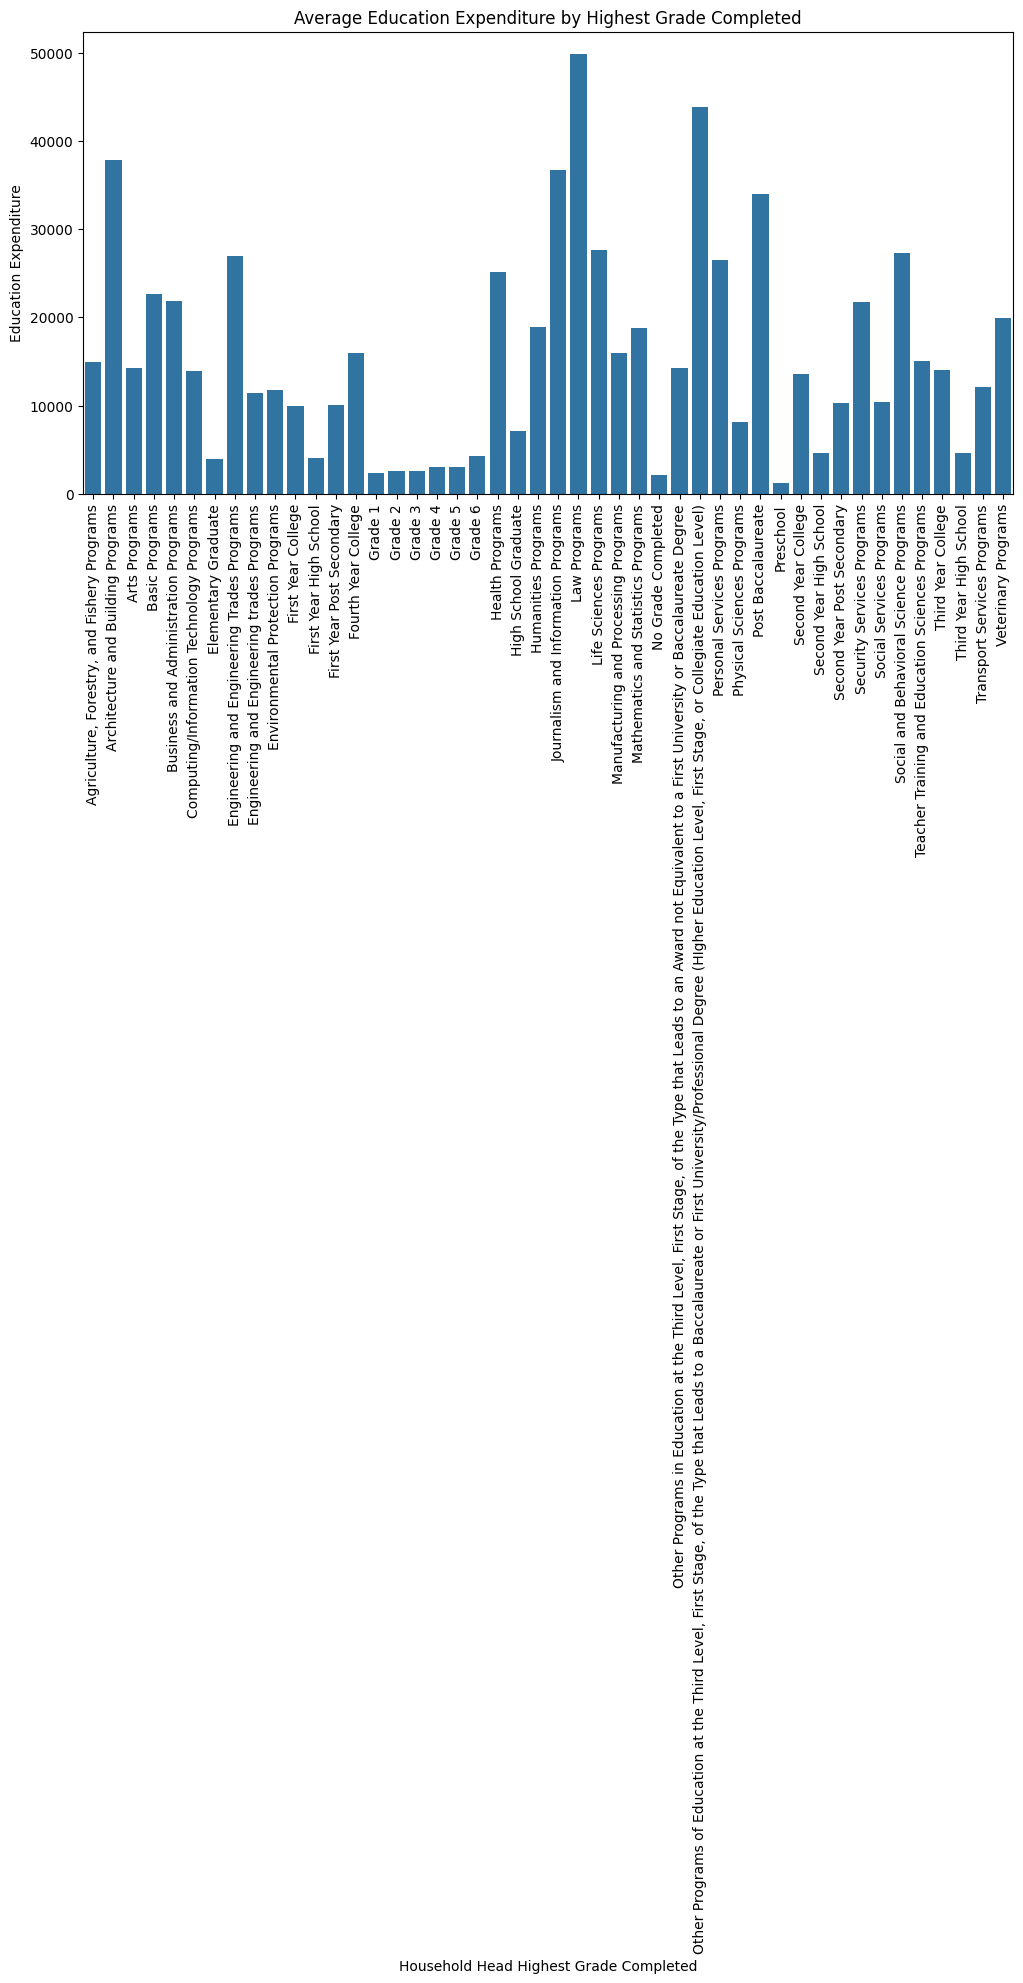

In [22]:
avg_education_expenditure = df.groupby('Household Head Highest Grade Completed')['Education Expenditure'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='Household Head Highest Grade Completed', y='Education Expenditure', data=avg_education_expenditure)
plt.title('Average Education Expenditure by Highest Grade Completed')
plt.xticks(rotation=90)
plt.show()


<h1> 8.Is there a difference in average food expenditure between agricultural and non-agricultural households? </h1> 

<h2>INSIGHT</h2>
<h3> The boxplot shows that agricultural households tend to spend less on food compared to non-agricultural households , suggesting either self-sufficiency in food production or lower overall purchasing power. There is also a noticeable difference in the range of spending, indicating more variability in food habits across different agricultural households. </h3> 

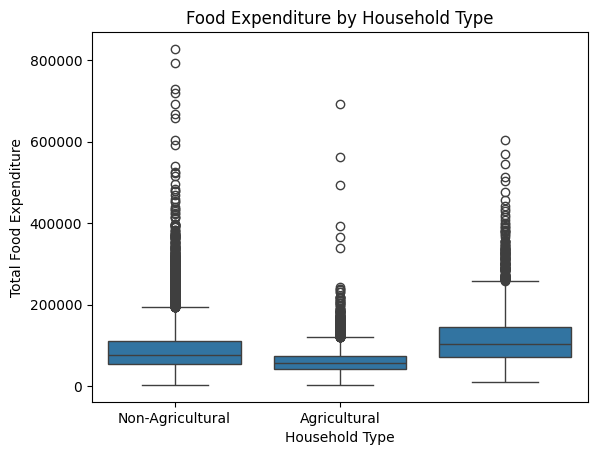

In [23]:
sns.boxplot(x='Agricultural Household indicator', y='Total Food Expenditure', data=df)
plt.xticks([0, 1], ['Non-Agricultural', 'Agricultural'])
plt.title('Food Expenditure by Household Type')
plt.ylabel('Total Food Expenditure')
plt.xlabel('Household Type')
plt.show()


<h1> 9. How does the average expenditure on special occasions vary by region? </h1> 

<h2>INSIGHT</h2>
<h3>The average expenditure on special occasions varies significantly by region, indicating cultural differences in how families celebrate events. </h3> 

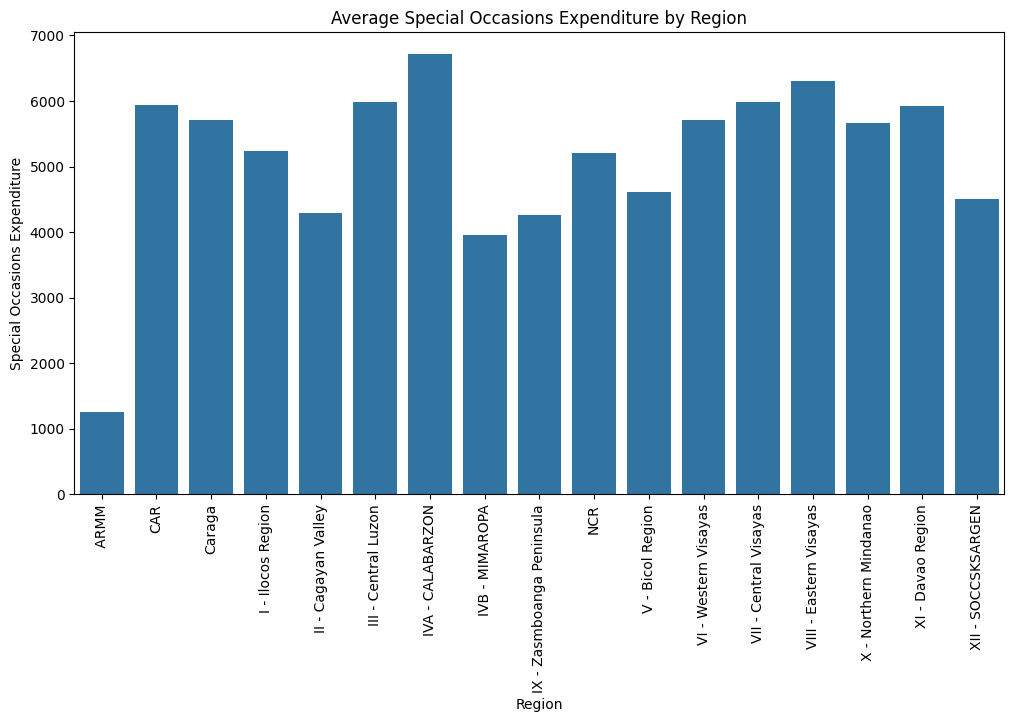

In [24]:
avg_special_occasions = df.groupby('Region')['Special Occasions Expenditure'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='Special Occasions Expenditure', data=avg_special_occasions)
plt.title('Average Special Occasions Expenditure by Region')
plt.xticks(rotation=90)
plt.show()


<h1>10. Does the marital status of the household head influence the total household income?</h1> 

<h2>INSIGHT</h2>
<h3> Annulment is often a costly legal process , so only individuals with sufficient financial resources may pursue it. This could explain why this group has higher average income — they’re more likely to afford legal procedures and therefore come from more affluent backgrounds.</h3> 

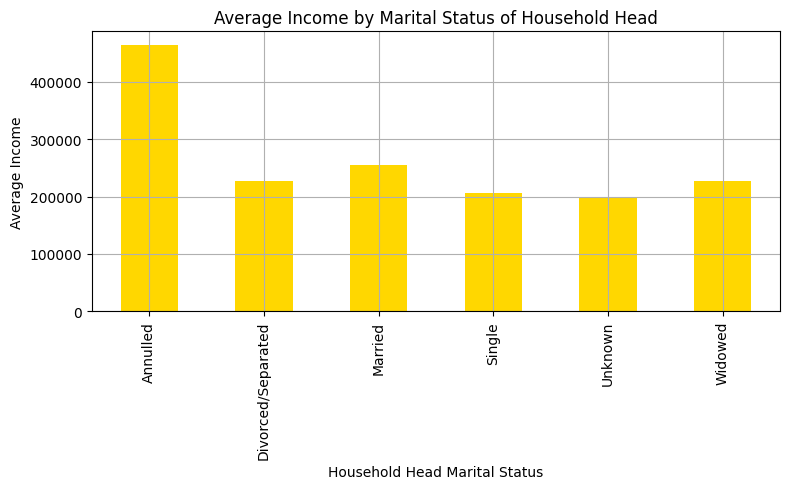

In [43]:
income_by_marital_status = df.groupby('Household Head Marital Status')['Total Household Income'].mean()

income_by_marital_status.plot(kind='bar', color='gold', figsize=(8, 5))
plt.title('Average Income by Marital Status of Household Head')
plt.ylabel('Average Income')
plt.grid(True)
plt.tight_layout()
plt.show()


<h1> 11. How does the expenditure on transportation vary by region? </h1> 

<h2>INSIGHT</h2>
<h3> The average transportation expenditure shows significant variation across regions, which may be influenced by the availability of public transport and distances traveled. </h3> 

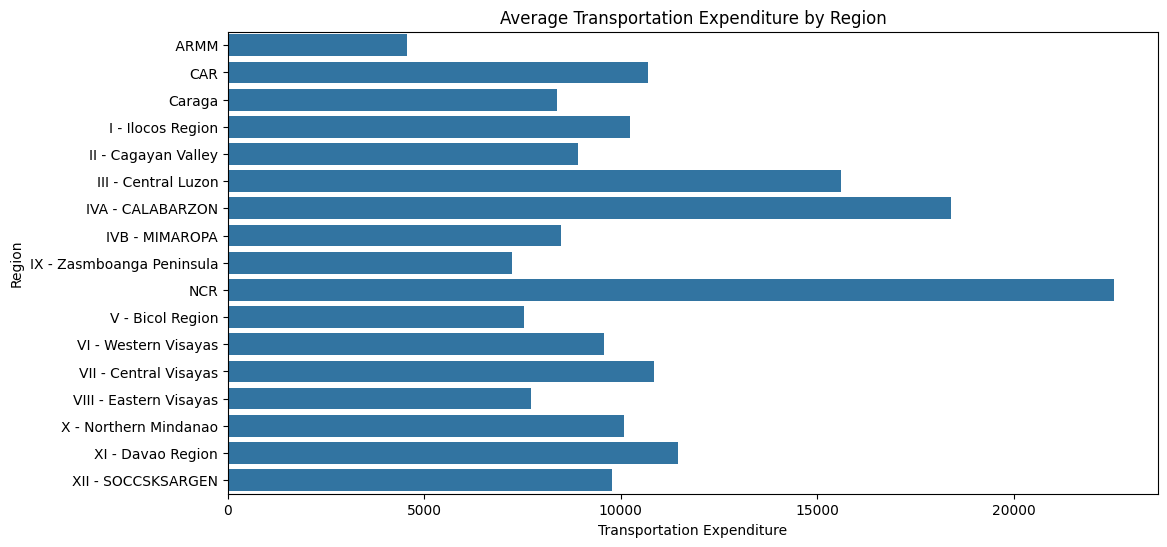

In [45]:
avg_transportation_expenditure = df.groupby('Region')['Transportation Expenditure'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='Transportation Expenditure', y='Region', data=avg_transportation_expenditure)
plt.title('Average Transportation Expenditure by Region')
plt.xticks()
plt.show()


<h1>12. What is the average expenditure on clothing, footwear, and other wear by marital status? </h1> 

<h2>INSIGHT</h2>
<h3> The average expenditure on clothing and footwear is generally higher for annulled individuals compared to single or widowed individuals, reflecting family needs. </h3> 

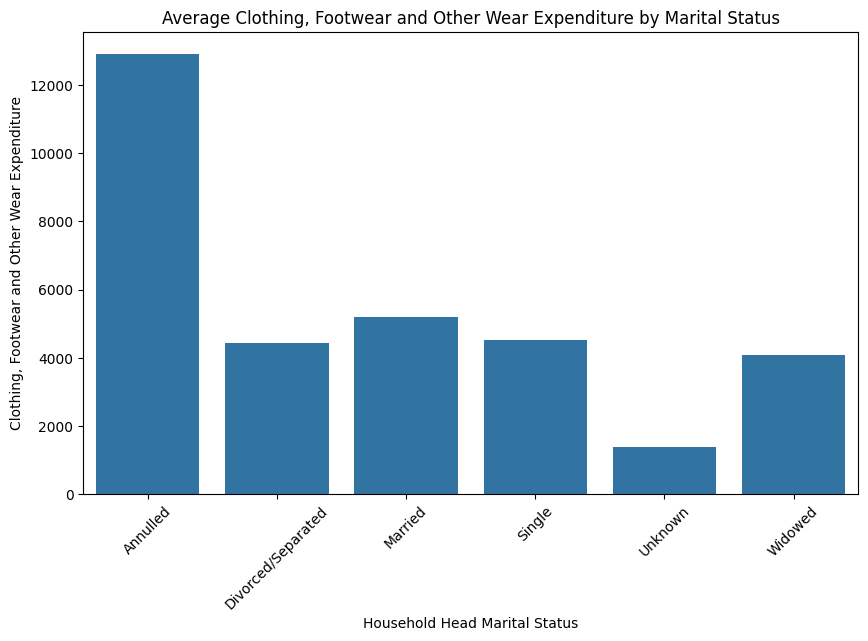

In [27]:

avg_clothing_expenditure = df.groupby('Household Head Marital Status')['Clothing, Footwear and Other Wear Expenditure'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Household Head Marital Status', y='Clothing, Footwear and Other Wear Expenditure', data=avg_clothing_expenditure)
plt.title('Average Clothing, Footwear and Other Wear Expenditure by Marital Status')
plt.xticks(rotation=45)
plt.show()


<h1> 13. How does the expenditure on alcoholic beverages vary by household head's age? </h1> 

<h2>INSIGHT</h2>
<h3> The pie chart indicates that expenditure on alcoholic beverages tends to increase with age, peaking in middle age, which may reflect lifestyle choices. </h3> 

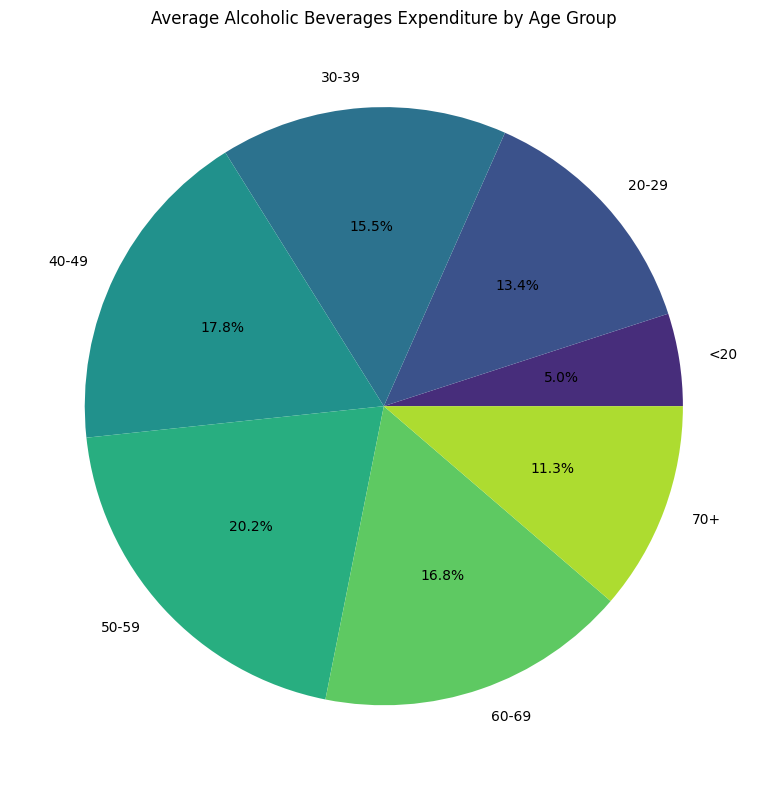

In [46]:
# Define age groups/bin
bins = [0, 20, 30, 40, 50, 60, 70, 100]
labels = ['<20', '20-29', '30-39', '40-49', '50-59', '60-69', '70+']

# Create new column for age group
df['Age Group'] = pd.cut(df['Household Head Age'], bins=bins, labels=labels, right=False)

# Calculate average alcohol expenditure per age group
avg_alcohol_by_age_group = df.groupby('Age Group')['Alcoholic Beverages Expenditure'].mean()

# Plot as pie chart
plt.figure(figsize=(8, 8))
avg_alcohol_by_age_group.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette("viridis", len(avg_alcohol_by_age_group)))
plt.title('Average Alcoholic Beverages Expenditure by Age Group')
plt.ylabel('')  # Hide y-label
plt.tight_layout()
plt.show()

<h1> 14. How does the total income from entrepreneurial activities vary by region? </h1> 

<h2>INSIGHT</h2>
<h3> The average income from entrepreneurial activities varies significantly by region, suggesting that some areas may have more opportunities for entrepreneurship.</h3> 

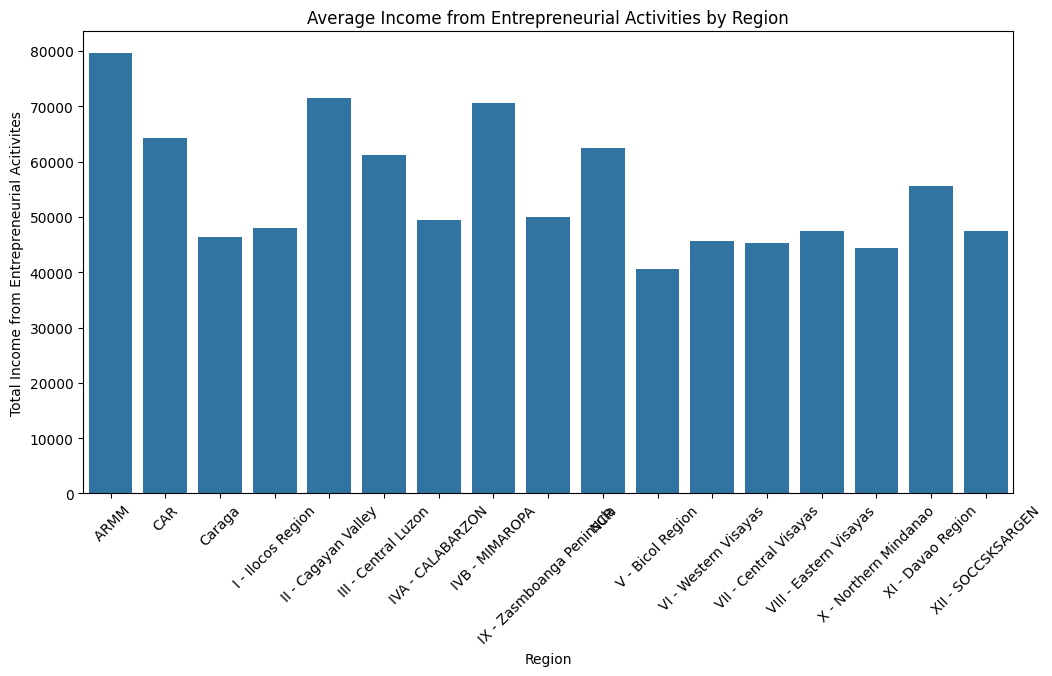

In [29]:

avg_entrepreneurial_income = df.groupby('Region')['Total Income from Entrepreneurial Acitivites'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='Total Income from Entrepreneurial Acitivites', data=avg_entrepreneurial_income)
plt.title('Average Income from Entrepreneurial Activities by Region')
plt.xticks(rotation=45)
plt.show()


<h1> 15. What is the average expenditure on miscellaneous goods and services by household head's age? </h1> 

<h2>INSIGHT</h2>
<h3> The average expenditure on miscellaneous goods and services tends to increase with age, indicating that older households may have more diverse spending needs.</h3> 

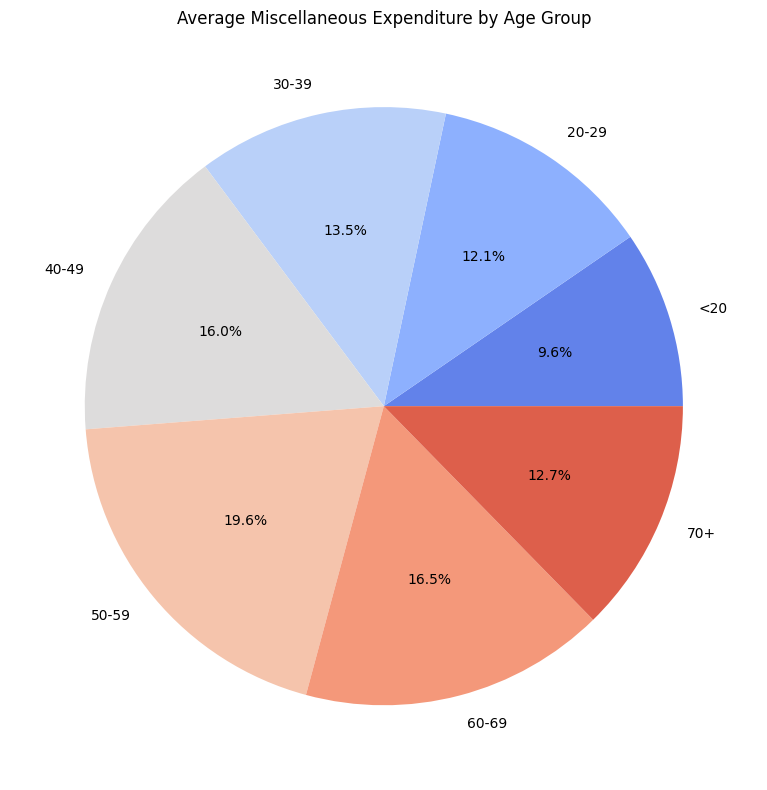

In [47]:
# Define age groups/bin
bins = [0, 20, 30, 40, 50, 60, 70, 100]
labels = ['<20', '20-29', '30-39', '40-49', '50-59', '60-69', '70+']

# Create new column for age group
df['Age Group'] = pd.cut(df['Household Head Age'], bins=bins, labels=labels, right=False)

# Calculate average miscellaneous expenditure per age group
avg_misc_by_age_group = df.groupby('Age Group')['Miscellaneous Goods and Services Expenditure'].mean()

# Plot as pie chart
plt.figure(figsize=(8, 8))
avg_misc_by_age_group.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette("coolwarm", len(avg_misc_by_age_group)))
plt.title('Average Miscellaneous Expenditure by Age Group')
plt.ylabel('')  # Hide y-label
plt.tight_layout()
plt.show()

<h1> 16. What is the average total household income by type of household? </h1> 

<h2>INSIGHT</h2>
<h3> The average total household income varies by type of household, with extended families generally having lower incomes compared to single-family households, reflecting different economic dynamics.</h3> 

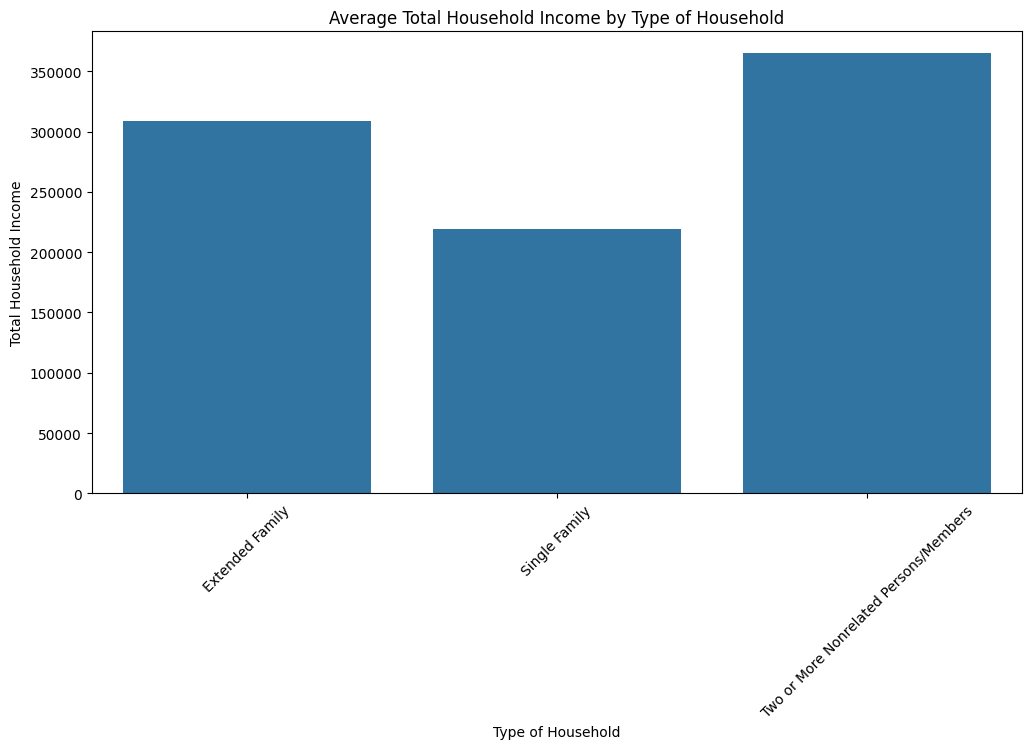

In [31]:

avg_income_by_household_type = df.groupby('Type of Household')['Total Household Income'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='Type of Household', y='Total Household Income', data=avg_income_by_household_type)
plt.title('Average Total Household Income by Type of Household')
plt.xticks(rotation=45)
plt.show()


<h1> 17. What are the distribution of Total Household Income? </h1> 

<h2>INSIGHT</h2>
<h3> The histogram shows that most households have relatively low total incomes , with a sharp drop-off at higher income levels. This right-skewed distribution suggests that low-income households are the majority , which could influence spending patterns, access to services, and overall quality of life.</h3> 

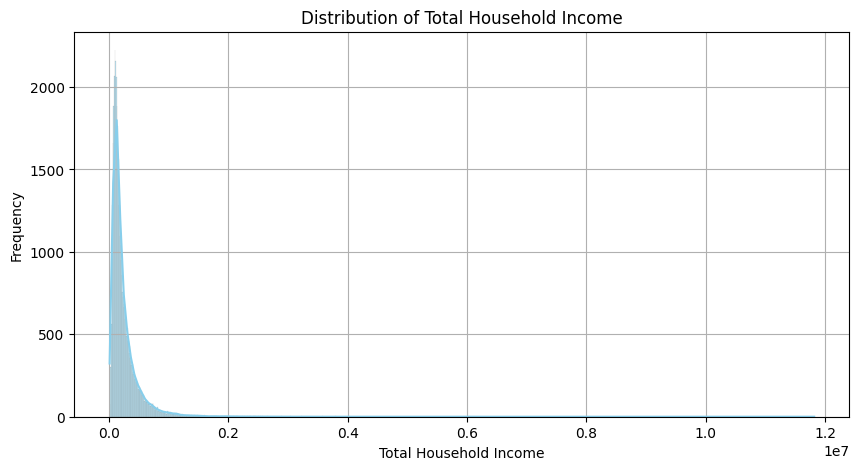

In [32]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Total Household Income'], kde=True, color='skyblue')
plt.title('Distribution of Total Household Income')
plt.xlabel('Total Household Income')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


<h1> 18. What is the average food expenditure per region? </h1> 

<h2>INSIGHT</h2>
<h3> The chart reveals significant variation in average food expenditure across regions. Urban or developed regions tend to have higher spending , while rural or less developed areas show lower spending , possibly due to lower income or greater self-sufficiency in food production.</h3> 

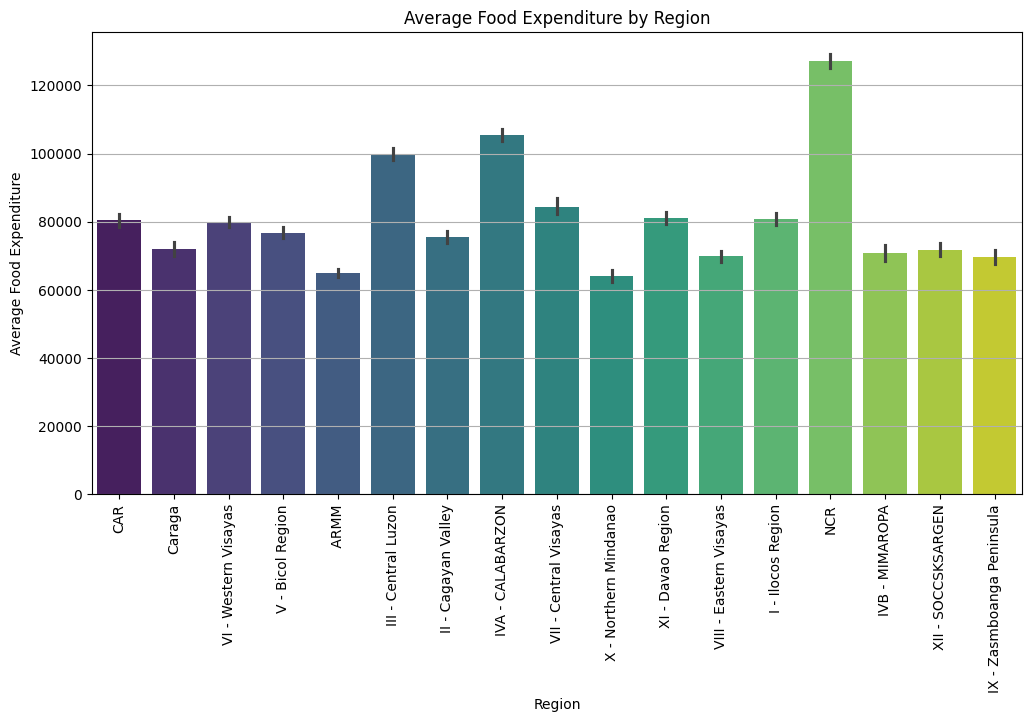

In [33]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='Total Food Expenditure', data=df, estimator=np.mean, palette='viridis')
plt.xticks(rotation=90)
plt.title('Average Food Expenditure by Region')
plt.ylabel('Average Food Expenditure')
plt.xlabel('Region')
plt.grid(True, axis='y')
plt.show()


<h1> 19. What is the relationship between household income and education expenditure? </h1> 

<h2>INSIGHT</h2>
<h3> The plot reveals a general trend where households with higher incomes tend to spend more on education , though there is significant variation. Some low-income households still prioritize education spending, highlighting the importance of education across different economic groups.</h3> 

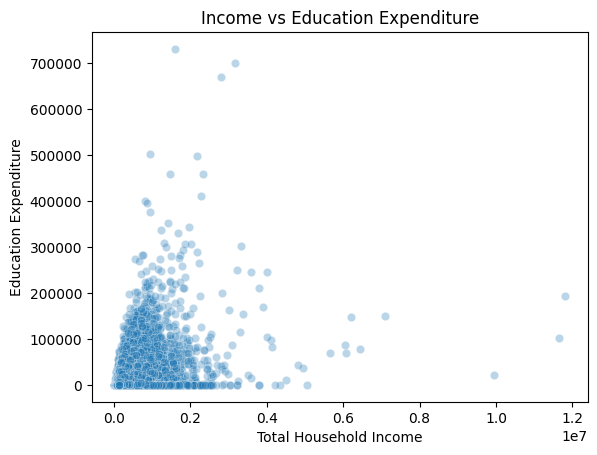

In [34]:
sns.scatterplot(data=df, x='Total Household Income', y='Education Expenditure', alpha=0.3)
plt.title('Income vs Education Expenditure')
plt.xlabel('Total Household Income')
plt.ylabel('Education Expenditure')
plt.show()


<h1> 20. What is the distribution of total household income? </h1> 

<h2>INSIGHT</h2>
<h3> The histogram shows that most households have relatively low incomes , with only a small portion earning significantly more. This skewed distribution highlights the need for targeted economic support programs aimed at improving livelihoods for the majority low-income group.

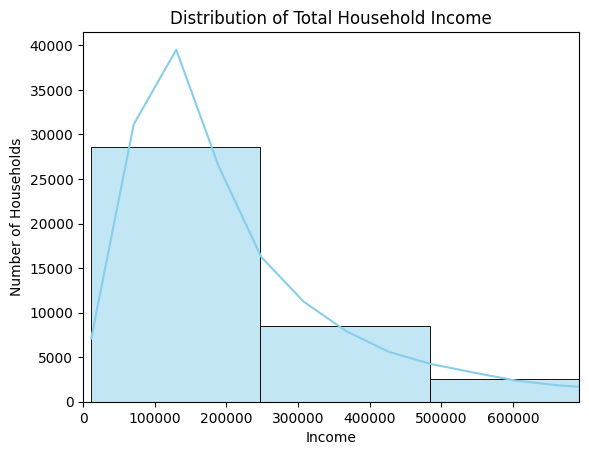

In [35]:
sns.histplot(df['Total Household Income'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Total Household Income')
plt.xlabel('Income')
plt.ylabel('Number of Households')
plt.xlim(0, df['Total Household Income'].quantile(0.95))  # limit outliers
plt.show()


<h1> 21. Which expenditure category has the highest average spending? </h1> 

<h2>INSIGHT</h2>
<h3> Total Food-related expenses (like rice and meat) are typically among the highest. </h3> 

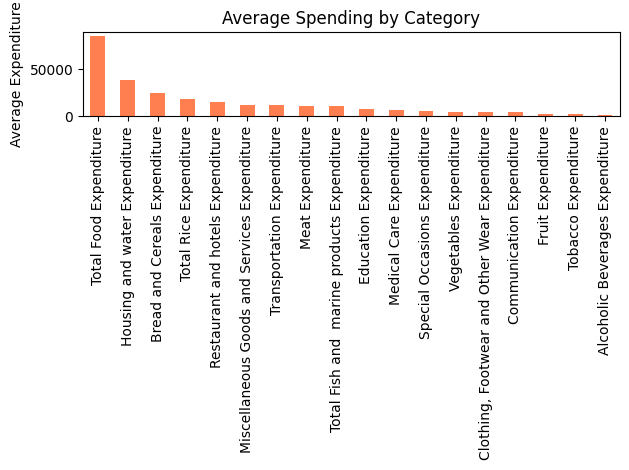

In [36]:
expenditure_cols = [col for col in df.columns if 'Expenditure' in col and 'Total Household' not in col]
avg_spending = df[expenditure_cols].mean().sort_values(ascending=False)

avg_spending.plot(kind='bar', color='coral')
plt.title('Average Spending by Category')
plt.ylabel('Average Expenditure')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


<h1> 22. What is the correlation between household income and other expenditures? </h1> 

<h2>INSIGHT</h2>
<h3> Expenditures on education, housing, and transportation show strong positive correlation with income. </h3> 

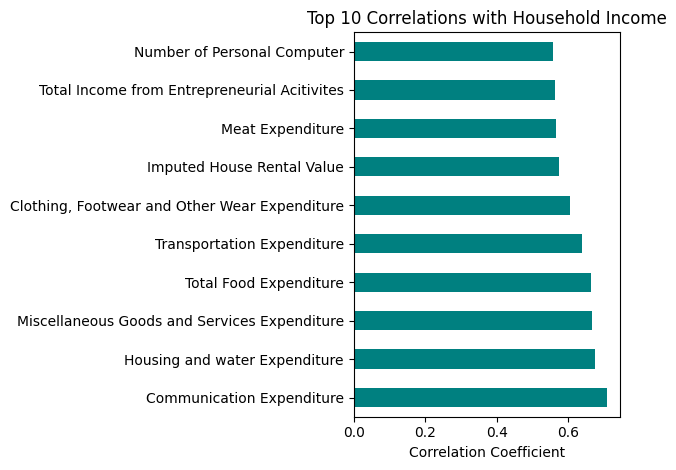

In [37]:
income_corr = df.corr(numeric_only=True)['Total Household Income'].sort_values(ascending=False)[1:11]
income_corr.plot(kind='barh', color='teal')
plt.title('Top 10 Correlations with Household Income')
plt.xlabel('Correlation Coefficient')
plt.tight_layout()
plt.show()


<h1> 23. How does the number of employed family members affect household income? </h1> 

<h2>INSIGHT</h2>
<h3> More employed members in the household generally lead to higher income. </h3> 

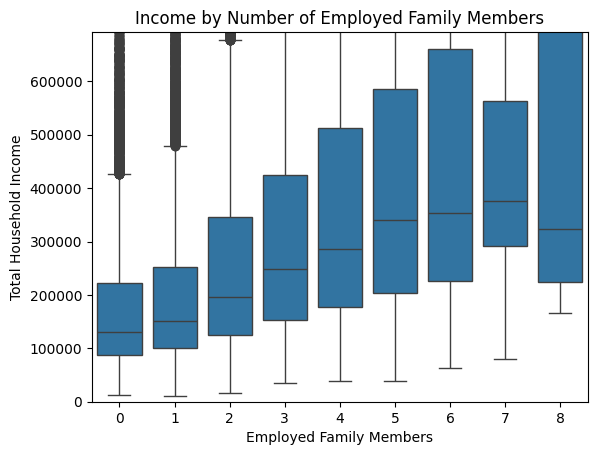

In [38]:
sns.boxplot(x='Total number of family members employed', y='Total Household Income', data=df)
plt.title('Income by Number of Employed Family Members')
plt.xlabel('Employed Family Members')
plt.ylabel('Total Household Income')
plt.ylim(0, df['Total Household Income'].quantile(0.95))
plt.show()


<h1> 24. What is the average education expenditure by region? </h1> 

<h2>INSIGHT</h2>
<h3> Some regions allocate significantly more to education, indicating regional inequality. </h3> 

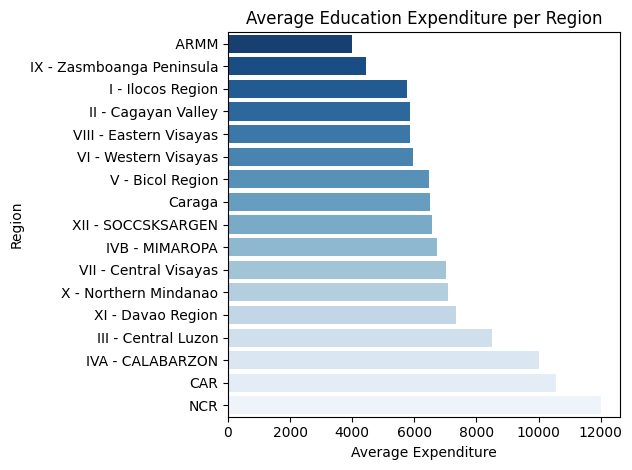

In [39]:
region_edu = df.groupby('Region')['Education Expenditure'].mean().sort_values()
sns.barplot(x=region_edu.values, y=region_edu.index, palette='Blues_r')
plt.title('Average Education Expenditure per Region')
plt.xlabel('Average Expenditure')
plt.ylabel('Region')
plt.tight_layout()
plt.show()
    

<h1> 25. Do male or female household heads tend to have higher household income? </h1> 

<h2>INSIGHT</h2>
<h3> This highlights whether male or female-headed households tend to have higher income. </h3> 

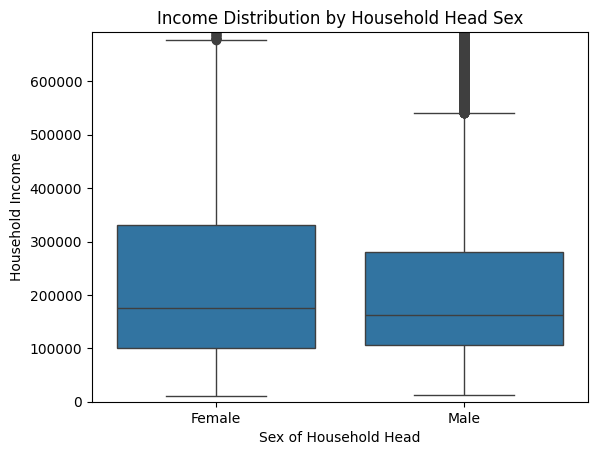

In [40]:
sns.boxplot(x='Household Head Sex', y='Total Household Income', data=df)
plt.title('Income Distribution by Household Head Sex')
plt.xlabel('Sex of Household Head')
plt.ylabel('Household Income')
plt.ylim(0, df['Total Household Income'].quantile(0.95))
plt.show()


<h1> 26.What is the age distribution of household heads? </h1> 

<h2>ANSWER</h2>
<h3> Most household heads are middle-aged, with a peak typically between 40 and 60. </h3> 

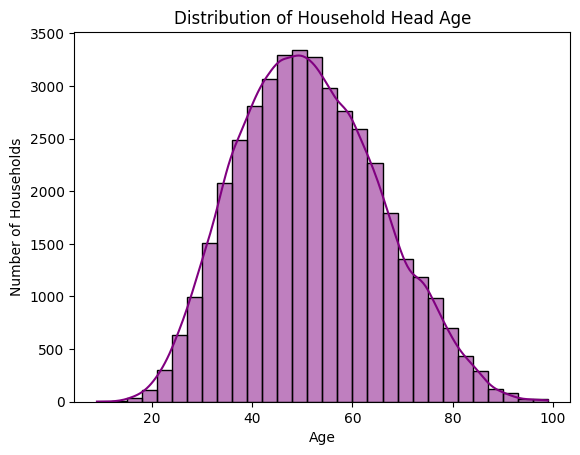

In [41]:
sns.histplot(df['Household Head Age'], bins=30, kde=True, color='purple')
plt.title('Distribution of Household Head Age')
plt.xlabel('Age')
plt.ylabel('Number of Households')
plt.show()
